In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [5]:
#Reading the Dataset
df=pd.read_csv('loan_data.csv')
df.head()


,credit_criteria_meet,purpose,interest_rate,installment,log_of_income,debt_income_ratio,fico_score,days_with_credit_line,revolving_balance,revolving_utilization,inquiry_last_6months,times_surpassed_payment_in_2yrs,derogatory_public_record,loan_defaulted
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   credit_criteria_meet             9578 non-null   int64  
 1   purpose                          9578 non-null   object 
 2   interest_rate                    9578 non-null   float64
 3   installment                      9578 non-null   float64
 4   log_of_income                    9578 non-null   float64
 5   debt_income_ratio                9578 non-null   float64
 6   fico_score                       9578 non-null   int64  
 7   days_with_credit_line            9578 non-null   float64
 8   revolving_balance                9578 non-null   int64  
 9   revolving_utilization            9578 non-null   float64
 10  inquiry_last_6months             9578 non-null   int64  
 11  times_surpassed_payment_in_2yrs  9578 non-null   int64  
 12  derogatory_public_re

In [7]:
df.isna().sum()

credit_criteria_meet               0
purpose                            0
interest_rate                      0
installment                        0
log_of_income                      0
debt_income_ratio                  0
fico_score                         0
days_with_credit_line              0
revolving_balance                  0
revolving_utilization              0
inquiry_last_6months               0
times_surpassed_payment_in_2yrs    0
derogatory_public_record           0
loan_defaulted                     0
dtype: int64

In [8]:
df['credit_criteria_meet'].unique()

array([1, 0])

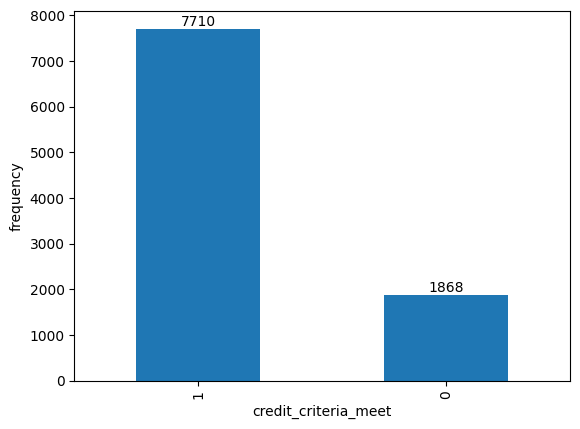

In [9]:
ax=df['credit_criteria_meet'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.xlabel('credit_criteria_meet')
plt.ylabel('frequency')
plt.show()

In [10]:
#Finding the unique values in column 'purpose'.
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [11]:
#So there are 7 different purposes for which loan are taken.
df['purpose'].nunique()

7

Text(0, 0.5, 'purpose of loan')

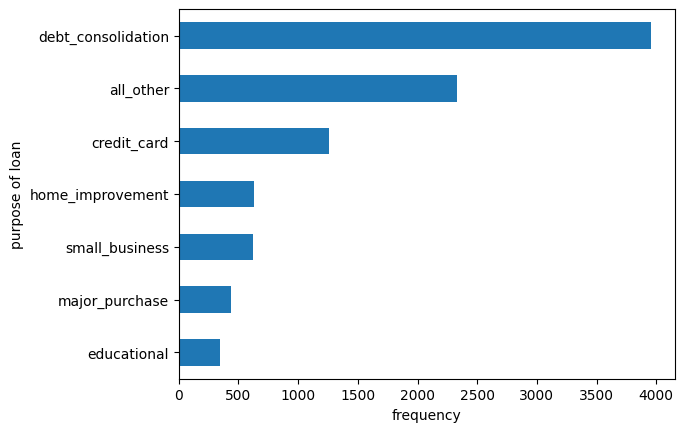

In [12]:
df['purpose'].value_counts().sort_values().plot(kind='barh')
plt.xlabel('frequency')
plt.ylabel('purpose of loan')

In [13]:
#Finding the 5 point summary of column 'Interest Rate'
df['interest_rate'].describe()[['min','max','mean','50%','std']]

min     0.060000
max     0.216400
mean    0.122640
50%     0.122100
std     0.026847
Name: interest_rate, dtype: float64

<Axes: xlabel='interest_rate', ylabel='Count'>

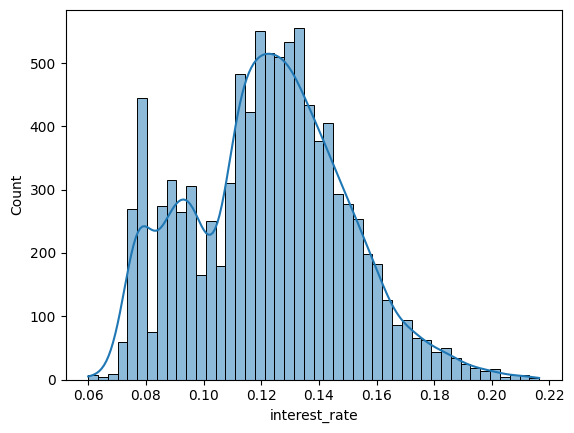

In [14]:
#Finding the distribution of data in 'Interest Rate' column.
sns.histplot(df['interest_rate'],kde=True)

In [15]:
#Finding the 5 point summary of column 'Installment'.
df['installment'].describe()[['min','max','mean','50%','std']]

min      15.670000
max     940.140000
mean    319.089413
50%     268.950000
std     207.071301
Name: installment, dtype: float64

<Axes: xlabel='installment', ylabel='Count'>

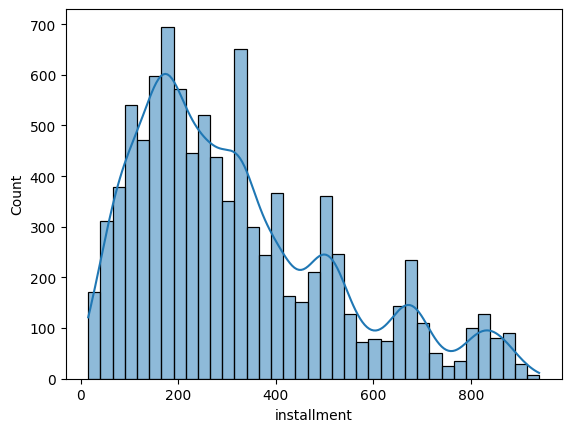

In [16]:
#Finding the distribution of data in 'Installment' column.
sns.histplot(df['installment'],kde=True)

In [17]:
df['loan_defaulted'].unique()

array([0, 1])

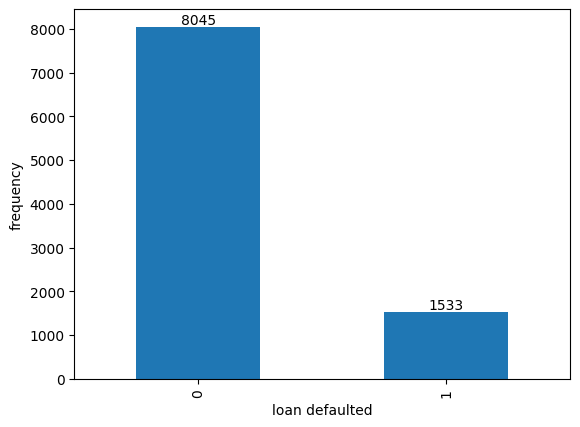

In [18]:
ax=df['loan_defaulted'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.xlabel('loan defaulted')
plt.ylabel('frequency')
plt.show()

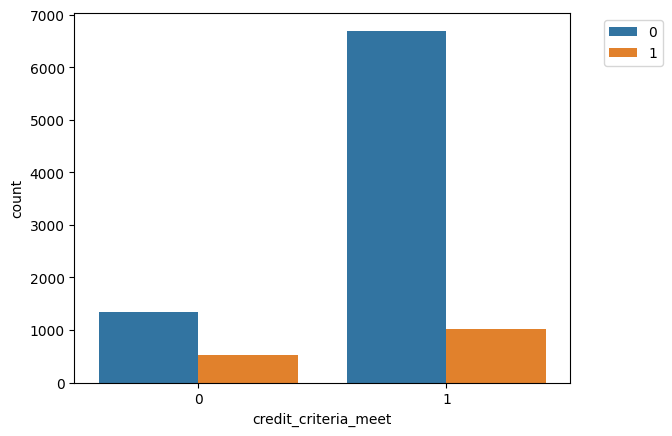

In [20]:
sns.countplot(x='credit_criteria_meet', hue='loan_defaulted', data=df)
plt.legend(bbox_to_anchor=(1.2, 1))

Text(0, 0.5, 'purpose of loan')

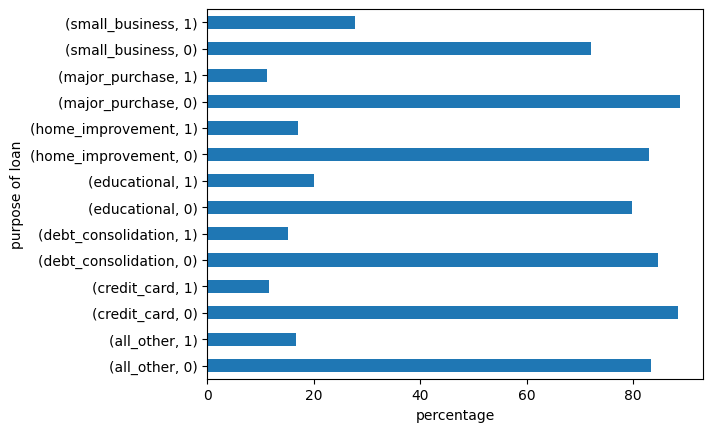

In [21]:
(df.groupby(df['purpose']).loan_defaulted.value_counts(sum)*100).plot(kind='barh')
plt.xlabel('percentage')
plt.ylabel('purpose of loan')

<Axes: xlabel='days_with_credit_line', ylabel='Density'>

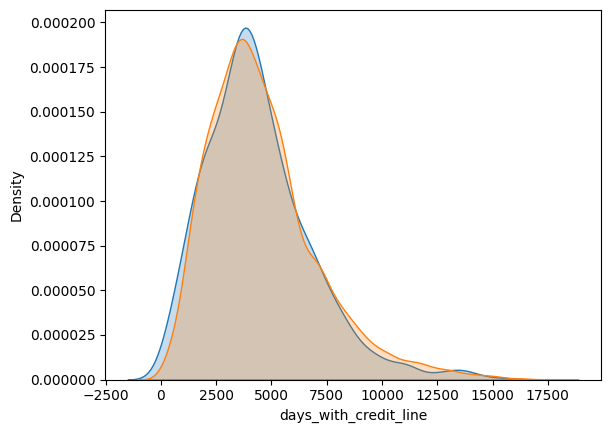

In [25]:
# Filter the data for different categories of loan_defaulted
defaulted_days = df[df['loan_defaulted'] == True]['days_with_credit_line']
non_defaulted_days = df[df['loan_defaulted'] == False]['days_with_credit_line']

# Plot KDE plots for different categories
sns.kdeplot(defaulted_days, fill=True, label='Defaulted')
sns.kdeplot(non_defaulted_days, fill=True, label='Non-defaulted')


<Axes: xlabel='revolving_balance', ylabel='revolving_utilization'>

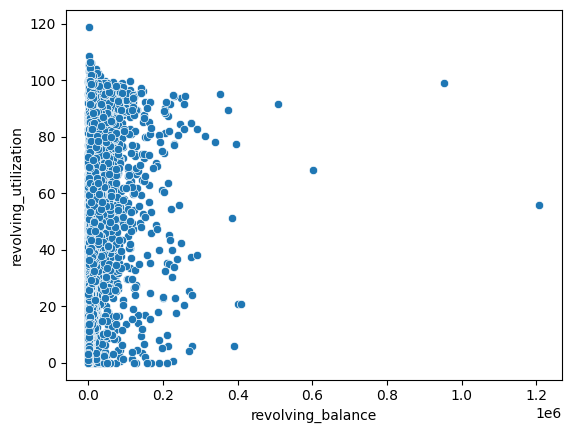

In [26]:
sns.scatterplot(x=df['revolving_balance'],y=df['revolving_utilization'])

<Axes: xlabel='fico_score', ylabel='interest_rate'>

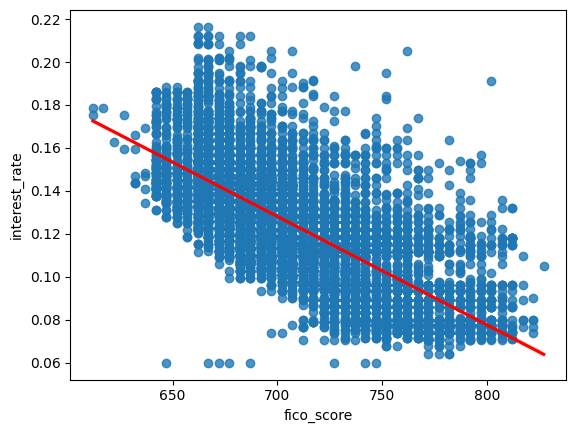

In [23]:
sns.regplot(x=df['fico_score'],y=df['interest_rate'],line_kws={'color':'red'})

<Axes: >

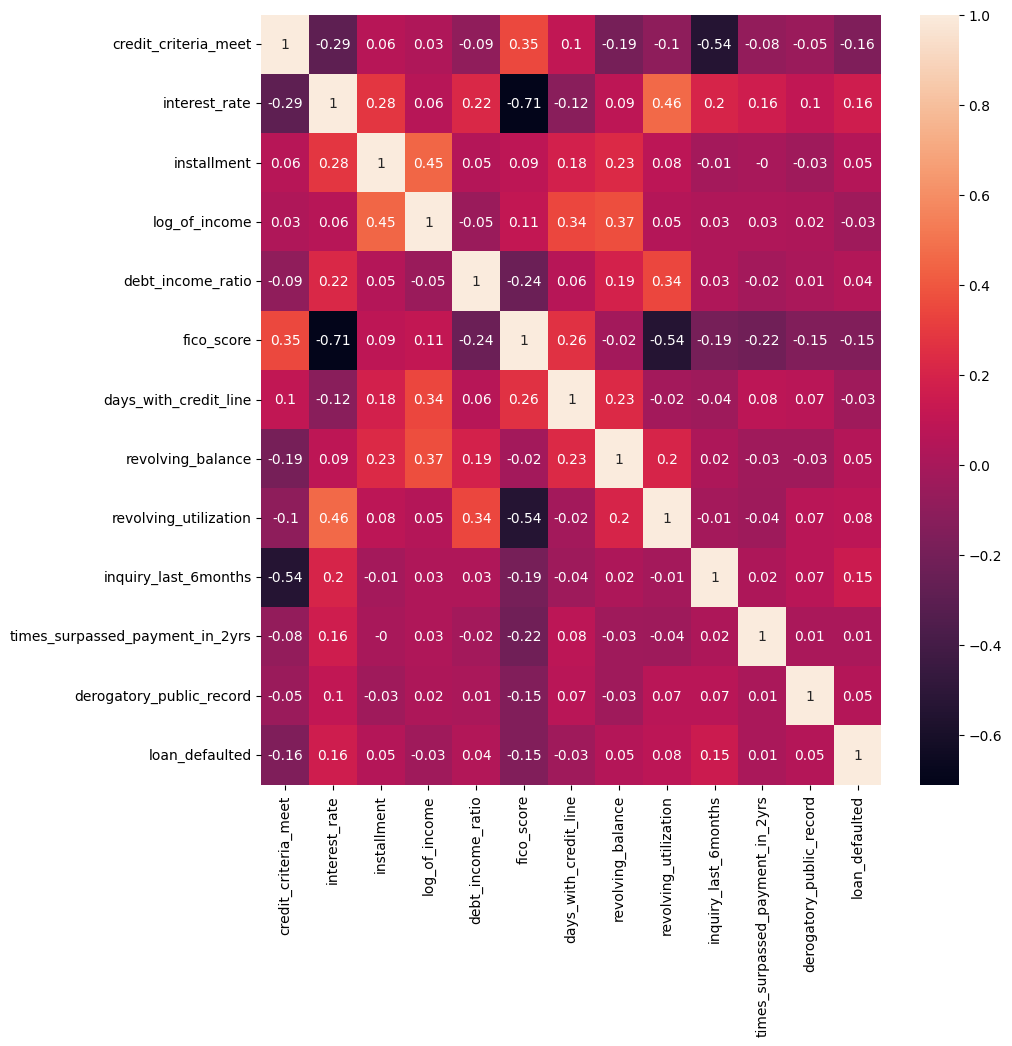

In [27]:
#Finding the correlation between different columns in te data.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(2),annot=True)

Text(0, 0.5, 'features')

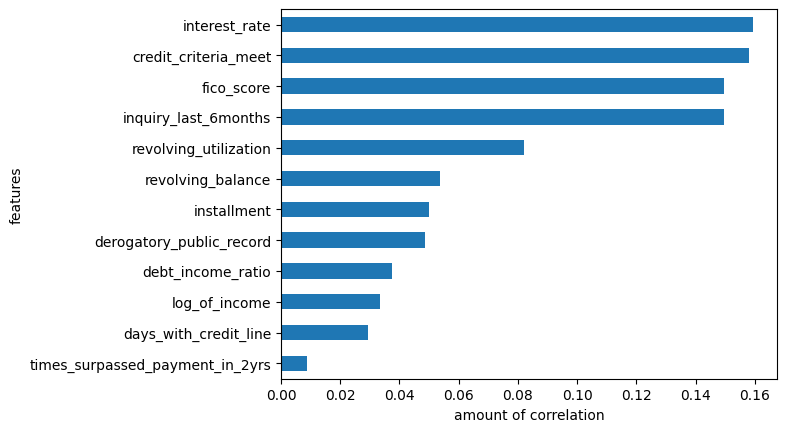

In [28]:
#Finding the correlation of all features with target variable ( Loan defaulted ).
s=df.corr()
s['loan_defaulted'].abs().sort_values().head(12).plot(kind='barh')
plt.xlabel('amount of correlation')
plt.ylabel('features')